In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [118]:
flights = pd.read_csv('flights_remainder.csv', delimiter=',')
flights['date'] = flights['date'].astype(str)
flights['date'] = pd.to_datetime(flights['date'])

In [119]:
flights

,date,remainder
0,1949-01-01,4.405303
1,1949-02-01,17.496212
2,1949-03-01,7.496212
3,1949-04-01,9.587121
4,1949-05-01,-5.231061
...,...,...
127,1959-08-01,8.867424
128,1959-09-01,-7.132576
129,1959-10-01,-9.496212
130,1959-11-01,-8.587121


Figure(432x288)


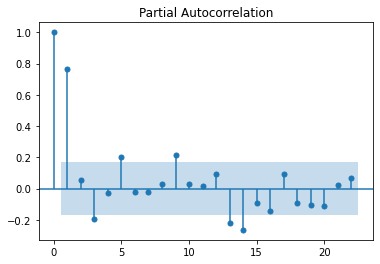

In [120]:
from statsmodels.graphics.tsaplots import plot_pacf

print(plot_pacf(flights['remainder']))

In [121]:
flights['lag1'] = flights['remainder'].shift(1)
flights['lag2'] = flights['remainder'].shift(2)
flights['lag3'] = flights['remainder'].shift(3)
flights['lag4'] = flights['remainder'].shift(4)
flights['lag5'] = flights['remainder'].shift(5)

In [122]:
flights_2 = flights.set_index('date')

In [123]:
flights_2.head(10)

,remainder,lag1,lag2,lag3,lag4,lag5
date,,,,,,
1949-01-01,4.405303,NaN,NaN,NaN,NaN,NaN
1949-02-01,17.496212,4.405303,NaN,NaN,NaN,NaN
1949-03-01,7.496212,17.496212,4.405303,NaN,NaN,NaN
1949-04-01,9.587121,7.496212,17.496212,4.405303,NaN,NaN
1949-05-01,-5.231061,9.587121,7.496212,17.496212,4.405303,NaN
1949-06-01,-12.776515,-5.231061,9.587121,7.496212,17.496212,4.405303
1949-07-01,-19.412879,-12.776515,-5.231061,9.587121,7.496212,17.496212
1949-08-01,-20.321970,-19.412879,-12.776515,-5.231061,9.587121,7.496212
1949-09-01,-7.321970,-20.321970,-19.412879,-12.776515,-5.231061,9.587121


In [124]:
flights_2.drop(flights_2.index[[0,1,2,3,4]],axis=0,inplace=True)

In [125]:
m = LinearRegression()

In [126]:
X = flights_2.drop(flights_2[['remainder']],axis=1)
y = flights_2['remainder']

In [128]:
m.fit(X,y)

LinearRegression()

In [129]:
y_pred = m.predict(X)

In [130]:
flights.drop(flights.index[[0,1,2,3,4]],axis=0,inplace=True)

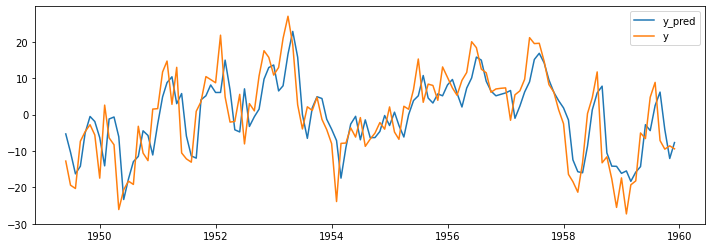

In [148]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(flights['date'],y_pred, label='y_pred')
plt.plot(flights['date'],y, label='y')
plt.legend()
plt.show()